In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np

In [2]:
# Import Data
path = '/Users/las/Documents/GitHub/REU/hill_climb_w_solution_counts.xlsx'
df = pd.read_excel(path)
data = df[[col for col in df.columns if col[0].isupper()]].rename(str.lower, axis='columns')
df.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,B4,B5,B6,C1,C2,C3,C4,C5,C6,Counts
0,0.080945,0.360232,0.057056,0.749259,0.955720,0.807542,0.632065,0.987198,0.858777,0.747515,...,1.009519,0.753096,0.486770,-0.004601,0.190029,0.265888,0.167961,0.726625,0.297465,26
1,0.020657,0.528250,0.785039,0.140394,0.629471,0.232232,0.442754,0.177439,0.541098,0.378114,...,0.461198,0.016416,0.170428,0.486811,0.728032,0.885663,0.050032,0.648216,0.157806,0
2,0.524718,0.271188,0.617312,0.352435,0.446476,0.870586,0.790443,0.930621,0.314740,0.650593,...,0.638183,0.010259,-0.030974,0.778479,1.059313,0.434567,0.503703,0.603667,0.192912,10
3,0.391623,0.766953,0.151090,0.986174,0.769373,0.199420,0.685867,0.058377,0.051811,0.073706,...,0.064034,0.401679,0.929817,0.090694,0.480075,0.301884,0.614086,0.812183,0.725908,20
4,0.914580,0.289532,0.338711,0.269049,0.688129,0.896449,0.850288,0.451521,0.327267,0.763946,...,0.408069,0.124350,-0.231770,0.388754,0.696648,0.785599,0.885972,0.387142,0.583846,8


In [3]:
# Create Training and Validation Data
count = np.array(data['counts'].values.tolist(), dtype=np.int)/2
param = np.array(data.drop('counts', axis=1).values.tolist(), dtype=np.float64)
n = int(0.8*len(count))

count_train, count_val = count[:n], count[n:]
param_train, param_val = param[:n], param[n:]

/Users/las/opt/anaconda3/envs/REU/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [4]:
# Set Up Network Architecture
model = keras.Sequential([
    keras.layers.Dense(units=1000, activation='relu', input_shape=(18,)),
    keras.layers.Dense(units=1000, activation='relu'),
    keras.layers.Dense(units=1, activation='relu')
])

model.summary()

2022-09-10 10:35:18.950907: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-10 10:35:18.955951: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              19000     
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1001      
Total params: 1,021,001
Trainable params: 1,021,001
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='Adam', 
              loss='mse',
              metrics=['mse', 'mae']
              )

In [42]:
# Train model
history = model.fit(param_train,
                    count_train,
                    verbose=2,
                    epochs=25,
                    batch_size=64,
                    validation_data=(
                        param_val,
                        count_val
                    )
)

Train on 80000 samples, validate on 20000 samples
Epoch 1/25
80000/80000 - 43s - loss: 0.9978 - mse: 0.9978 - mae: 0.7220 - val_loss: 0.7144 - val_mse: 0.7144 - val_mae: 0.6253
Epoch 2/25
80000/80000 - 49s - loss: 0.8938 - mse: 0.8938 - mae: 0.6770 - val_loss: 0.7444 - val_mse: 0.7444 - val_mae: 0.6357
Epoch 3/25
80000/80000 - 39s - loss: 0.8422 - mse: 0.8422 - mae: 0.6473 - val_loss: 0.6206 - val_mse: 0.6206 - val_mae: 0.5692
Epoch 4/25
80000/80000 - 40s - loss: 0.7155 - mse: 0.7155 - mae: 0.6088 - val_loss: 0.5723 - val_mse: 0.5723 - val_mae: 0.5519
Epoch 5/25
80000/80000 - 50s - loss: 0.6756 - mse: 0.6756 - mae: 0.5941 - val_loss: 0.8274 - val_mse: 0.8274 - val_mae: 0.6827
Epoch 6/25
80000/80000 - 40s - loss: 0.6683 - mse: 0.6683 - mae: 0.5827 - val_loss: 0.5269 - val_mse: 0.5269 - val_mae: 0.5247
Epoch 7/25
80000/80000 - 41s - loss: 0.6000 - mse: 0.6000 - mae: 0.5514 - val_loss: 0.6352 - val_mse: 0.6352 - val_mae: 0.5949
Epoch 8/25
80000/80000 - 40s - loss: 0.5776 - mse: 0.5776 - m

[]

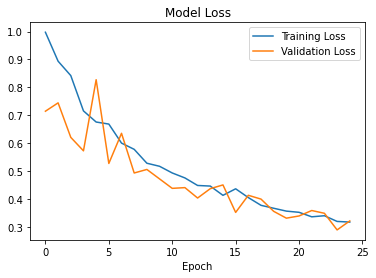

In [43]:
fig = plt.figure()
plt.title('Model Loss')
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.plot()

In [44]:
data = data.drop('predictions', axis=1)
predictions = 2*np.round(model.predict(param))
data.insert(19, 'predictions', predictions)

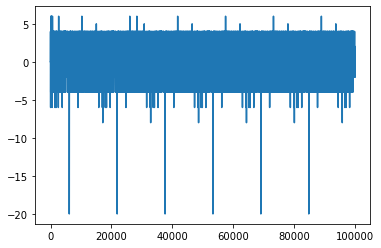

In [45]:
plt.plot(data.predictions-data.counts)

<AxesSubplot:>

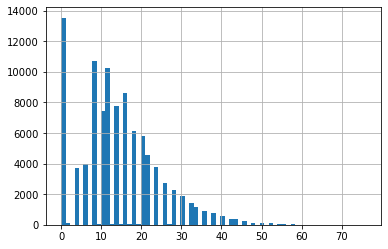

In [46]:
data.counts.hist(bins=69)

<AxesSubplot:>

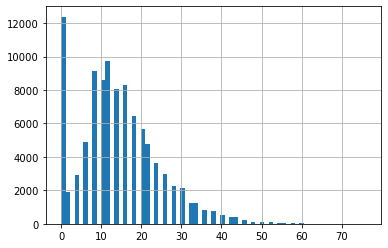

In [47]:
data.predictions.round(0).hist(bins=69)

In [53]:
k = 0
for i in data.predictions - data.counts:
    if i == 0:
        k+=1
print(f"Accuracy = {k/100000}")

Accuracy = 0.67334
